In [1]:
import torch
import torch.optim as optim
from model import DQN
from wrappers import make_atari_env
from replay_memory import ReplayBuffer
from utils_modif import train_modif, test_modif
from Param_modif import *


In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [4]:
env_id = "PongNoFrameskip-v4"
env = make_atari_env(env_id)
print(env.action_space)
env.unwrapped.get_action_meanings()

Discrete(6)


['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [7]:
current_model = DQN(env.observation_space.shape, env.action_space.n).to(device)    
target_model = DQN(env.observation_space.shape, env.action_space.n).to(device)    

optimizer = optim.Adam(current_model.parameters(), lr=0.0001)
replay_buffer = ReplayBuffer(MEMORY_SIZE)

target_model.load_state_dict(current_model.state_dict())


<All keys matched successfully>

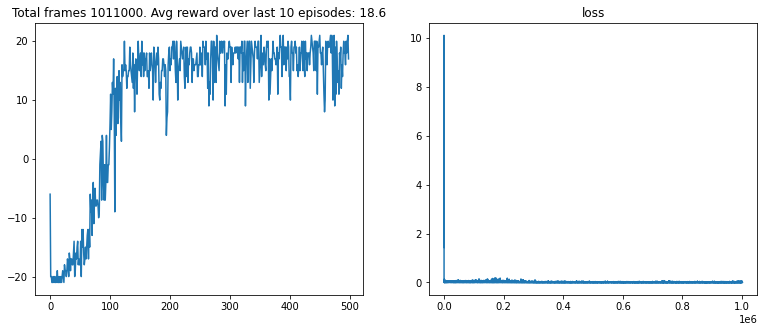

Saving weights at Episode 500 ...


In [8]:
train_modif(env, current_model,target_model, optimizer, replay_buffer, device)